In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [3]:
# 2. Import essential libraries for ML and data analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer

# Synthetic data generation
from sklearn.datasets import make_regression

# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Saving/loading models
import joblib

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 3. Load example dataset from seaborn
diamonds = sns.load_dataset('diamonds')
tips = sns.load_dataset('tips')

# Example: print first 5 rows to check
print(diamonds.head())
print(tips.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
 #4. Basic Data Cleaning example on diamonds dataset
print(diamonds.isnull().sum())  # Check missing values
diamonds_clean = diamonds.dropna()  # Drop missing values if any
print(diamonds_clean.describe())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
m

In [7]:
# 5. Encoding categorical variables example
diamonds_encoded = pd.get_dummies(diamonds_clean, drop_first=True)


In [9]:
# 6. Splitting data (example with diamonds dataset predicting price)
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (43152, 23), Test shape: (10788, 23)


In [10]:
# 7. Generating synthetic regression data example
X_synthetic, y_synthetic = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
print(X_synthetic[:5], y_synthetic[:5]/)

[[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]] [ 50.77992943 -10.06527016 -34.91839191  10.52674299 -17.73837724]


In [12]:
# 8. Creating polynomial features example
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_synthetic)
print(X_poly[:5])

[[ 1.          0.93128012  0.86728266]
 [ 1.          0.08704707  0.00757719]
 [ 1.         -1.05771093  1.11875241]
 [ 1.          0.31424733  0.09875139]
 [ 1.         -0.47917424  0.22960795]]


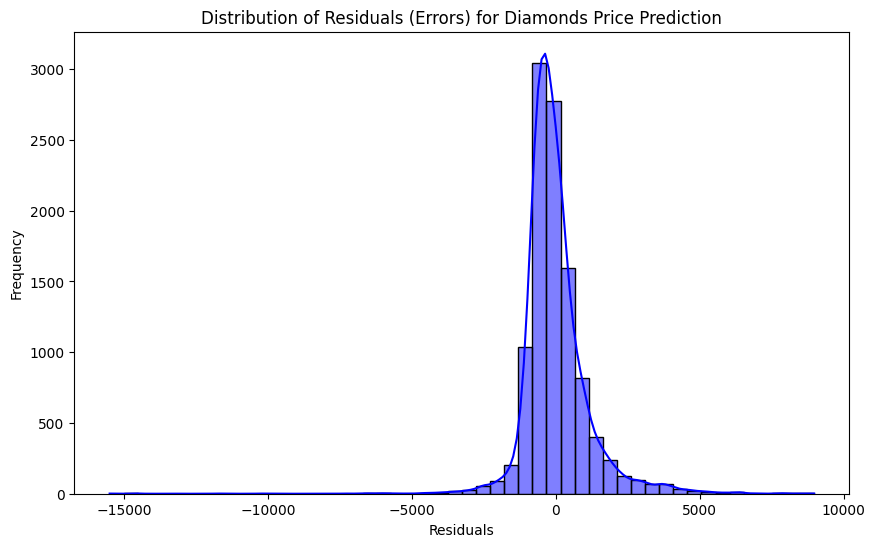

In [13]:
# Q1. Visualize the distribution of errors (residuals) for a multiple linear regression model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and clean diamonds dataset
diamonds = sns.load_dataset('diamonds').dropna()

# Encode categorical variables
diamonds_encoded = pd.get_dummies(diamonds, drop_first=True)

# Define features and target
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals using seaborn
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='blue', bins=50)
plt.title('Distribution of Residuals (Errors) for Diamonds Price Prediction')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Q2. Calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Using the previously trained model on diamonds dataset (Q1)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 1288705.48
Mean Absolute Error (MAE): 737.15
Root Mean Squared Error (RMSE): 1135.21


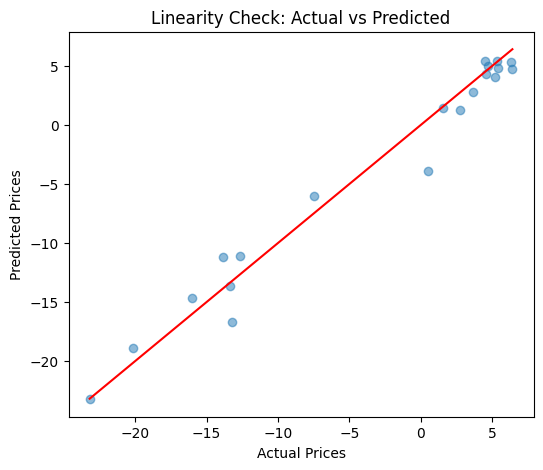

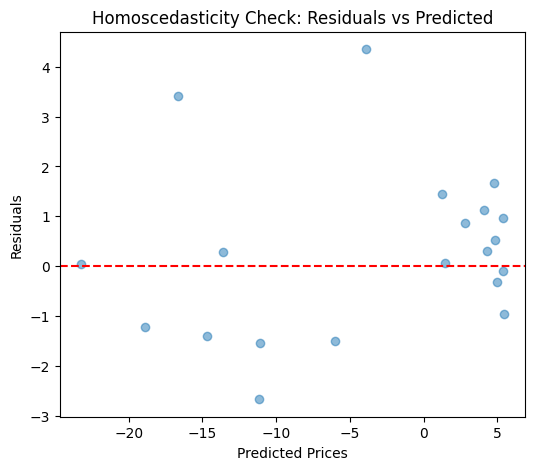

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1200x1000 with 0 Axes>

In [40]:
# Q3. Check if assumptions of linear regression are met:
# - Linearity: scatter plot of actual vs predicted
# - Homoscedasticity: residuals plot
# - Multicollinearity: correlation matrix and VIF

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Using diamonds_encoded dataset from Q1

# 1. Linearity check: Plot actual vs predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linearity Check: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # diagonal line
plt.show()

# 2. Homoscedasticity check: residuals vs predicted plot
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Predicted')
plt.show()

# 3. Multicollinearity check: correlation matrix heatmap
plt.figure(figsize=(12,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

# 4. Multicollinearity check: Variance Inflation Factor (VIF)
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print("Variance Inflation Factor (VIF) for features:")
print(vif_data.sort_values(by='VIF', ascending=False).head(10))  # Top 10 features by VIF

In [16]:
# Q4. Create a machine learning pipeline with feature scaling and evaluate performance of different regression models

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Using diamonds dataset encoded (from Q1)
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for Linear Regression and Ridge Regression with scaling
pipelines = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ])
}

# Fit and evaluate models
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R-squared score: {score:.4f}")


Linear Regression R-squared score: 0.9189
Ridge Regression R-squared score: 0.9189


In [17]:
# Q5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Using synthetic data generated before (Q1)
X_train, X_test, y_train, y_test = train_test_split(X_synthetic, y_synthetic, test_size=0.2, random_state=42)

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print coefficients, intercept, and R-squared score
print(f"Coefficient(s): {model.coef_}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")

Coefficient(s): [44.24418216]
Intercept: 0.0992
R-squared score: 0.9374


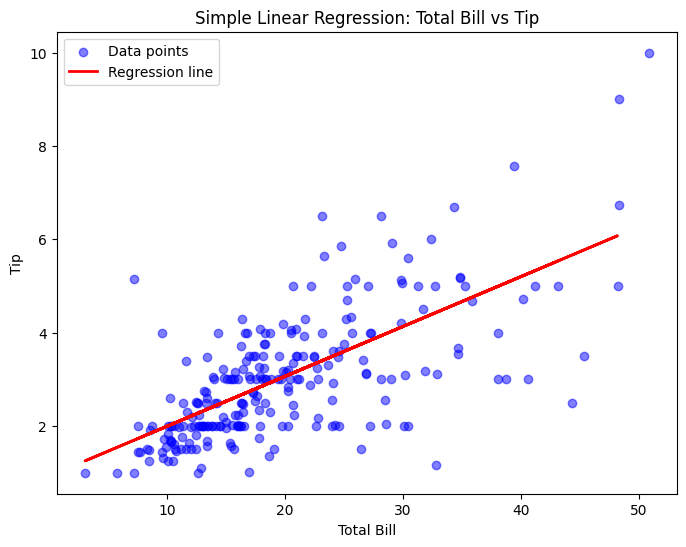

In [18]:
# Q6. Analyze relationship between total bill and tip in 'tips' dataset using simple linear regression and visualize results

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load 'tips' dataset
tips = sns.load_dataset('tips')

# Prepare data: feature and target
X = tips[['total_bill']]
y = tips['tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Plot actual data points and regression line
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.legend()
plt.show()

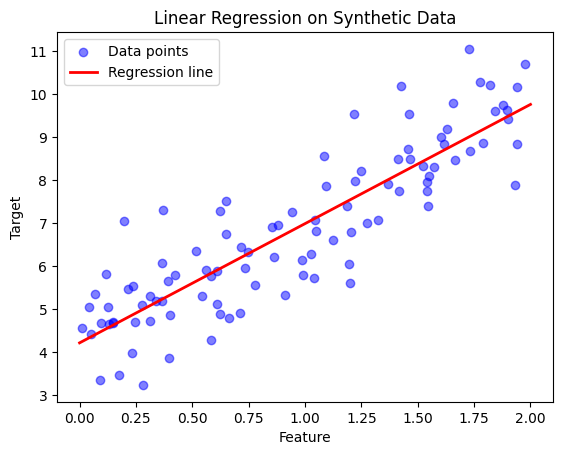

In [19]:
# Q7. Fit a linear regression model to synthetic dataset with one feature, predict new values, and plot data points with regression line

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)

# Plot data points and regression line
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X_new, y_predict, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

In [20]:
# Q8. Pickle a trained linear regression model and save it to a file

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model to a file using joblib
filename = 'linear_regression_model.pkl'
joblib.dump(model, filename)

print(f"Model saved to {filename}")

Model saved to linear_regression_model.pkl


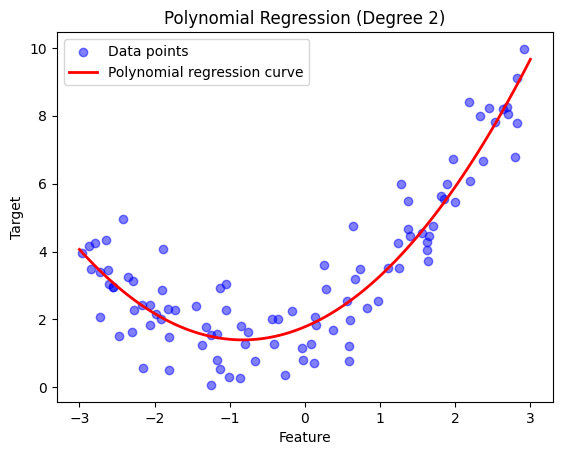

In [21]:
# Q9. Fit a polynomial regression model (degree 2) to a dataset and plot the regression curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

# Transform features to polynomial features degree 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot original data and polynomial regression curve
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial regression curve')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

In [22]:
# Q10. Generate synthetic data for simple linear regression, fit model, and print coefficient and intercept

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficient and intercept
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient: 45.4957
Intercept: 0.1488


Degree 1: MSE = 11.3483
Degree 2: MSE = 4.5758
Degree 3: MSE = 0.7725
Degree 4: MSE = 0.7635


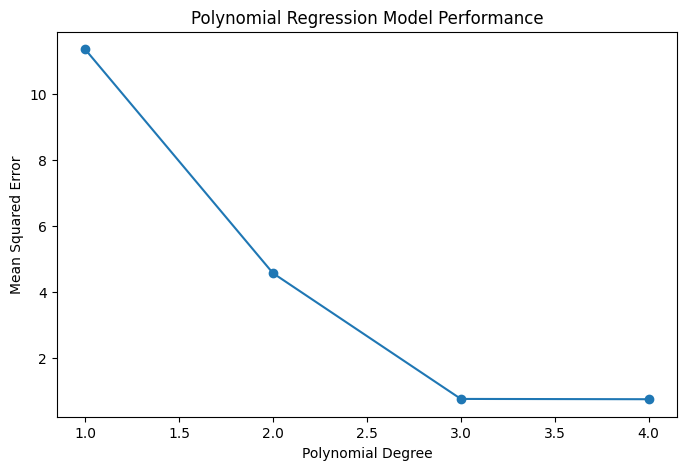

In [23]:
# Q11. Fit polynomial regression models of different degrees to a synthetic dataset and compare their performance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**3 - X**2 + X + 2 + np.random.randn(100, 1)

degrees = [1, 2, 3, 4]
mse_list = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Fit linear regression
    model = LinearRegression()
    model.fit(X_poly, y)

    # Predict on training data
    y_pred = model.predict(X_poly)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    mse_list.append(mse)

    print(f"Degree {degree}: MSE = {mse:.4f}")

# Plot MSE vs Degree
plt.figure(figsize=(8,5))
plt.plot(degrees, mse_list, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression Model Performance')
plt.show()

In [24]:
# Q12. Fit a simple linear regression model with two features and print the coefficients, intercept, and R-squared score

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with 2 features
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients, intercept, and R-squared score on test set
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

Coefficients: [86.31018533 73.66927906]
Intercept: 0.0660
R-squared score: 0.9836


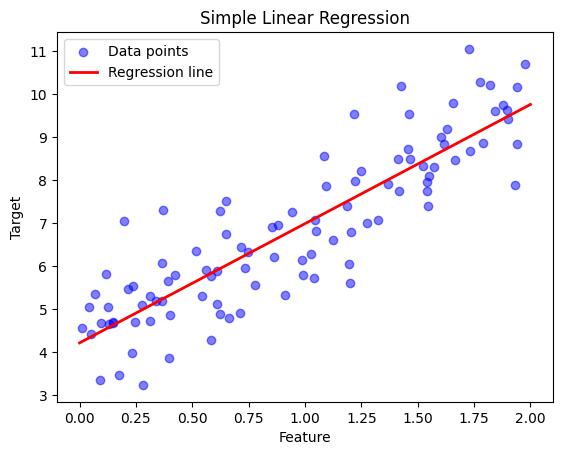

In [25]:
# Q13. Generate synthetic data, fit a linear regression model, and visualize regression line with data points

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)

# Plot data points and regression line
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X_new, y_predict, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [26]:
# Q14. Use Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression

# Generate synthetic data with 5 features
X, _ = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif_data)

     Feature       VIF
0  Feature_1  1.019320
1  Feature_2  1.012651
2  Feature_3  1.059337
3  Feature_4  1.046592
4  Feature_5  1.020596


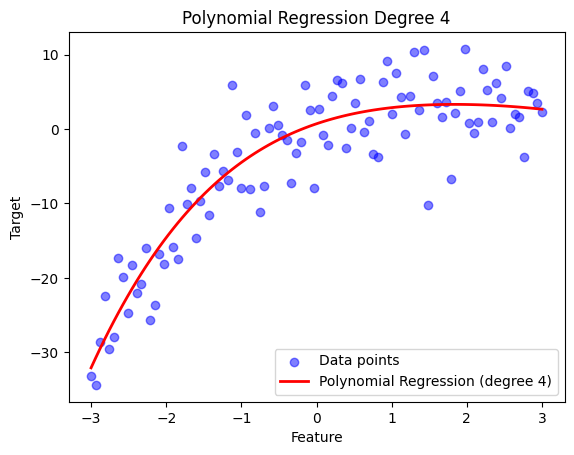

In [27]:
# Q15. Generate synthetic data for polynomial relationship (degree 4), fit polynomial regression, and plot regression curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2*X - X**2 + 0.5*X**3 - 0.1*X**4 + np.random.randn(100, 1) * 5

# Create polynomial features of degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot original data and regression curve
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression (degree 4)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Degree 4')
plt.legend()
plt.show()

In [28]:
# Q16. Create a machine learning pipeline with data standardization and multiple linear regression model, then print R-squared score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data with 5 features
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaler and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluate and print R-squared score on test set
r2 = pipeline.score(X_test, y_test)
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.9944


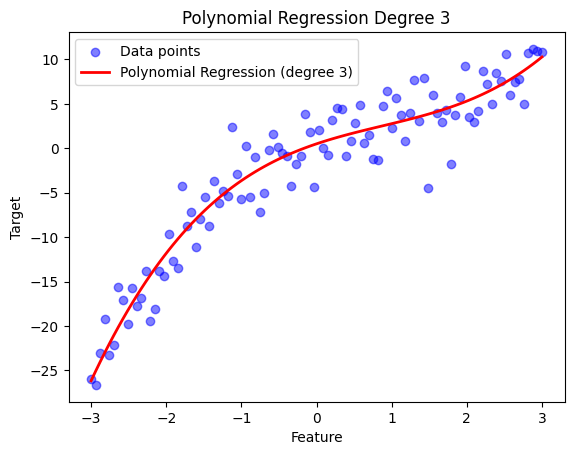

In [29]:
# Q17. Perform polynomial regression (degree 3) on a synthetic dataset and plot the regression curve

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2*X - X**2 + 0.5*X**3 + np.random.randn(100, 1) * 3

# Create polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot original data and regression curve
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Polynomial Regression (degree 3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Polynomial Regression Degree 3')
plt.legend()
plt.show()

In [30]:
# Q18. Perform multiple linear regression on a synthetic dataset with 5 features; print R-squared score and model coefficients

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data with 5 features
X, y = make_regression(n_samples=150, n_features=5, noise=15, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = model.score(X_test, y_test)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"R-squared score: {r2:.4f}")

Model Coefficients: [71.23838715 30.65592909 34.93263699 55.27881375 29.79815558]
Intercept: -1.1390260531461909
R-squared score: 0.9647


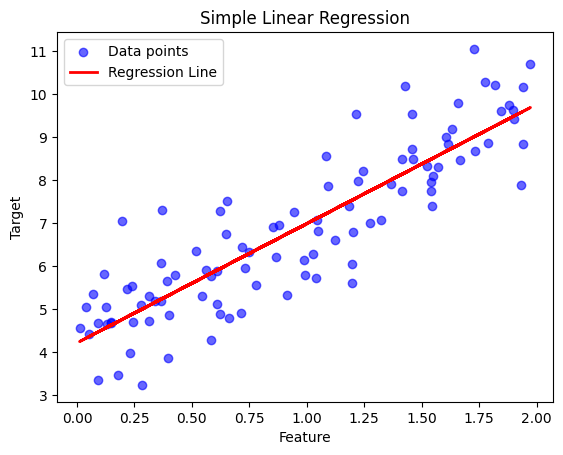

In [31]:
# Q19. Generate synthetic data for linear regression, fit a model, and visualize the data points along with the regression line

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot data points and regression line
plt.scatter(X, y, color='blue', alpha=0.6, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [32]:
# Q20. Create a synthetic dataset with 3 features, perform multiple linear regression, and print R-squared score and coefficients

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic dataset with 3 features
X, y = make_regression(n_samples=120, n_features=3, noise=20, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# R-squared score
r2 = model.score(X_test, y_test)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"R-squared score: {r2:.4f}")

Model Coefficients: [96.94891399 74.4521115  59.95252511]
Intercept: 0.8278962917257484
R-squared score: 0.9561


In [33]:
# Q21. Demonstrate serialization and deserialization of ML models using joblib instead of pickling

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=2, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save model to file using joblib
joblib.dump(model, 'linear_regression_model.joblib')
print("Model saved successfully with joblib.")

# Load model from file
loaded_model = joblib.load('linear_regression_model.joblib')
print("Model loaded successfully with joblib.")

# Verify loaded model by predicting
y_pred = loaded_model.predict(X_test)
print(f"Predictions with loaded model: {y_pred[:5]}")

Model saved successfully with joblib.
Model loaded successfully with joblib.
Predictions with loaded model: [-56.81958017  -0.48445919  84.58854407 -20.39611021  66.99347483]


In [34]:
# Q22. Perform linear regression with categorical features using one-hot encoding on the 'tips' dataset

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load tips dataset
tips = sns.load_dataset('tips')

# Features and target
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

# Define categorical columns
categorical_features = ['sex', 'smoker', 'day', 'time']

# ColumnTransformer for OneHotEncoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Create pipeline with preprocessing and linear regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared score: {r2:.4f}")

Mean Squared Error: 0.7034
R-squared score: 0.4373


In [35]:
# Q23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print coefficients and R-squared scores

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_regression(n_samples=150, n_features=5, noise=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)

# Fit models
lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate R-squared
r2_lin = lin_reg.score(X_test, y_test)
r2_ridge = ridge_reg.score(X_test, y_test)

# Print results
print("Linear Regression Coefficients:", lin_reg.coef_)
print(f"Linear Regression R-squared: {r2_lin:.4f}")

print("Ridge Regression Coefficients:", ridge_reg.coef_)
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")

Linear Regression Coefficients: [71.74156422 31.22198226 34.93751275 55.19645804 29.28956703]
Linear Regression R-squared: 0.9662
Ridge Regression Coefficients: [71.18296482 30.98805972 34.64796472 54.89236915 28.9187198 ]
Ridge Regression R-squared: 0.9663


In [36]:
# Q24. Use cross-validation to evaluate a Linear Regression model on a synthetic dataset

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

# Generate synthetic data
X, y = make_regression(n_samples=120, n_features=4, noise=10, random_state=42)

# Initialize model
model = LinearRegression()

# Perform 5-fold cross-validation with R-squared as scoring metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print cross-validation results
print("Cross-validation R-squared scores:", cv_scores)
print(f"Mean R-squared score: {cv_scores.mean():.4f}")
print(f"Standard deviation of scores: {cv_scores.std():.4f}")

Cross-validation R-squared scores: [0.97259463 0.99478491 0.98991816 0.96964673 0.98643353]
Mean R-squared score: 0.9827
Standard deviation of scores: 0.0098


In [37]:
# Q25. Compare polynomial regression models of different degrees and print the R-squared score for each

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 + 2 * X.flatten() - 0.5 * X.flatten()**2 + np.random.randn(100) * 2

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 4]
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_pred = model.predict(X_test_poly)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree} Polynomial Regression R-squared: {r2:.4f}")

Degree 1 Polynomial Regression R-squared: 0.8723
Degree 2 Polynomial Regression R-squared: 0.9743
Degree 3 Polynomial Regression R-squared: 0.9740
Degree 4 Polynomial Regression R-squared: 0.9721
